In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import kagglehub
import re
from sklearn.model_selection import train_test_split 

In [2]:
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")
import os
csv_path = os.path.join(path, "student_depression_dataset.csv")
df = pd.read_csv(csv_path)

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
category=['Gender','City','Profession','Degree','Have you ever had suicidal thoughts ?','Financial Stress','Family History of Mental Illness']

In [6]:
for col in category:
    df[col]=df[col].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  obj

In [8]:
def extract_hours(s):
    match = re.search(r"(\d+(\.\d+)?)", str(s))
    return float(match.group(1)) if match else np.nan

df['Sleep Duration'] = df['Sleep Duration'].apply(extract_hours)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27883 non-null  flo

In [10]:
mis=df.isnull().sum()
mis

id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [11]:
impute=SimpleImputer(missing_values=np.nan, strategy='median')

In [12]:
df['Sleep Duration']=impute.fit_transform(df[['Sleep Duration']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  flo

C:\Users\Asus\AppData\Local\Temp\ipykernel_10488\1421080155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression',data=df,palette="viridis")


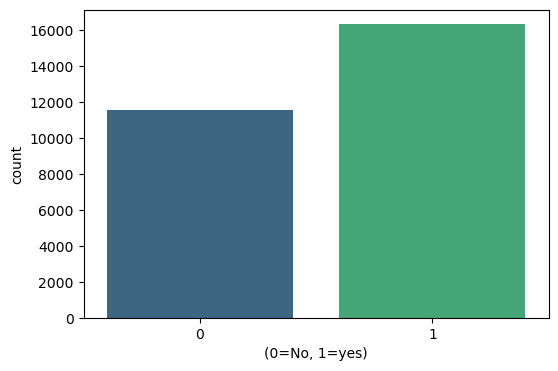

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Depression',data=df,palette="viridis")
plt.xlabel('(0=No, 1=yes)')
plt.show()

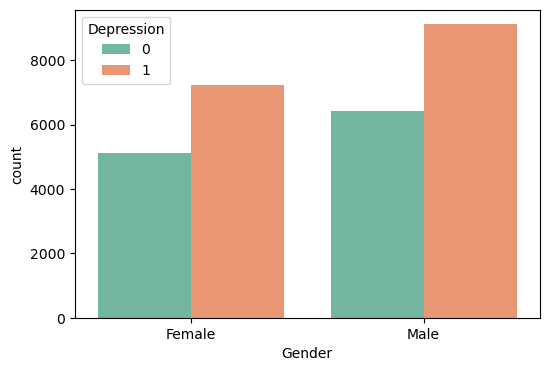

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Gender',hue='Depression',palette="Set2")
plt.show()

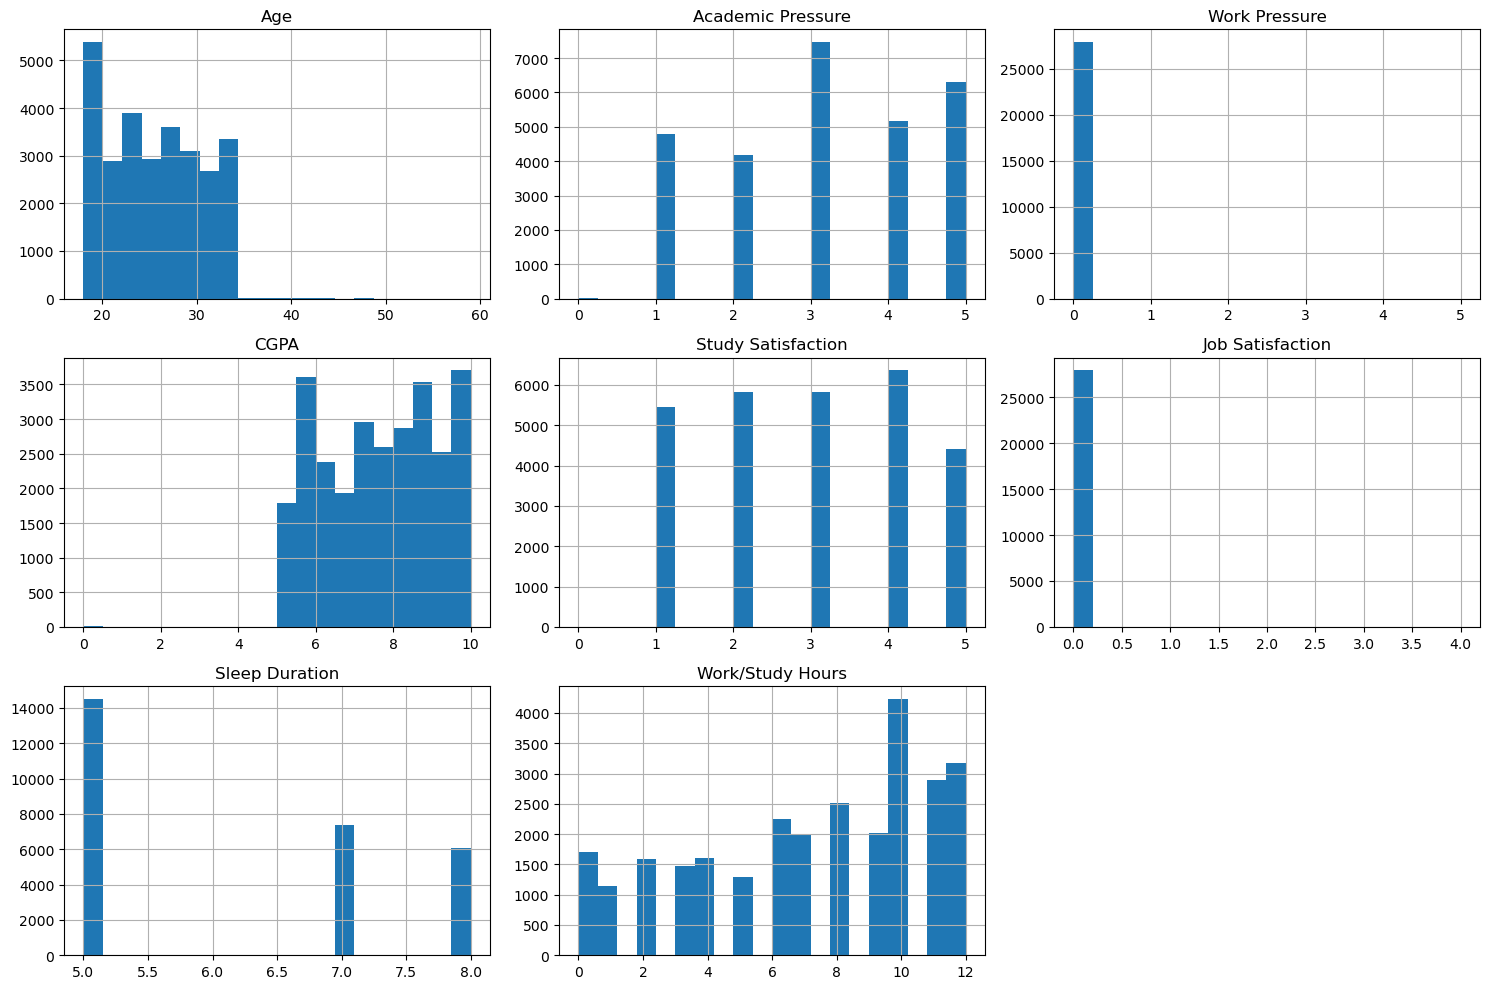

In [15]:
num_features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
df[num_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  flo

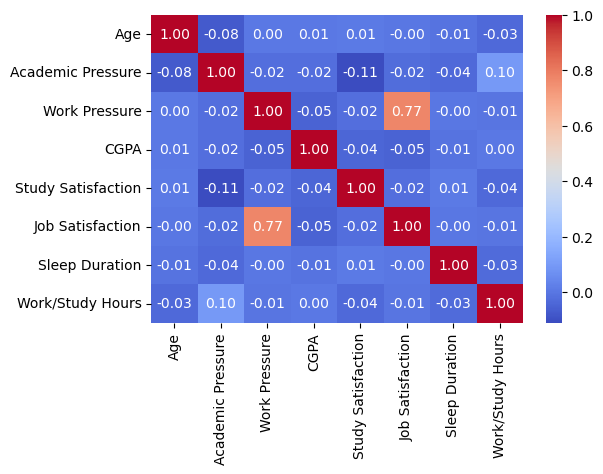

In [17]:
plt.figure(figsize=(6,4))
corrw=['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Work/Study Hours']
df_corrw=df[corrw]
sns.heatmap(df_corrw.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

In [18]:
cat_features=['Gender','City','Profession','Degree','Have you ever had suicidal thoughts ?','Financial Stress','Family History of Mental Illness']
df=pd.get_dummies(df, columns=cat_features, drop_first=True)

In [19]:
df=df.replace({True : 1,False : 0})

C:\Users\Asus\AppData\Local\Temp\ipykernel_10488\3241147304.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({True : 1,False : 0})


In [20]:
df.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,5.0,Healthy,3.0,...,0,0,0,1,0,0,0,0,0,0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,5.0,Moderate,3.0,...,0,0,0,0,1,0,0,0,0,1
2,26,31.0,3.0,0.0,7.03,5.0,0.0,5.0,Healthy,9.0,...,0,0,0,0,0,0,0,0,0,1
3,30,28.0,3.0,0.0,5.59,2.0,0.0,7.0,Moderate,4.0,...,0,0,0,1,0,0,0,1,0,1
4,32,25.0,4.0,0.0,8.13,3.0,0.0,5.0,Moderate,1.0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Columns: 110 entries, id to Family History of Mental Illness_Yes
dtypes: float64(8), int64(101), object(1)
memory usage: 23.4+ MB


In [22]:
X=df.drop(['id','Depression','Dietary Habits'],axis=1)
y=df['Depression']

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Columns: 107 entries, Age to Family History of Mental Illness_Yes
dtypes: float64(8), int64(99)
memory usage: 22.8 MB


In [24]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 27901 entries, 0 to 27900
Series name: Depression
Non-Null Count  Dtype
--------------  -----
27901 non-null  int64
dtypes: int64(1)
memory usage: 218.1 KB


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
model=RandomForestClassifier(n_estimators=1000,max_depth=20,n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [27]:
y_pred=model.predict(X_test)

T=pd.DataFrame({'thuc te':y_test , 'du doan':y_pred})
T

,thuc te,du doan
19981,0,0
16551,0,0
7640,0,0
21266,1,1
15759,1,0
...,...,...
6952,0,0
21045,0,0
22028,1,1
23,0,0


In [28]:
score=model.score(X_test,y_test)
score

0.8261960222182405

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2343
           1       0.84      0.87      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



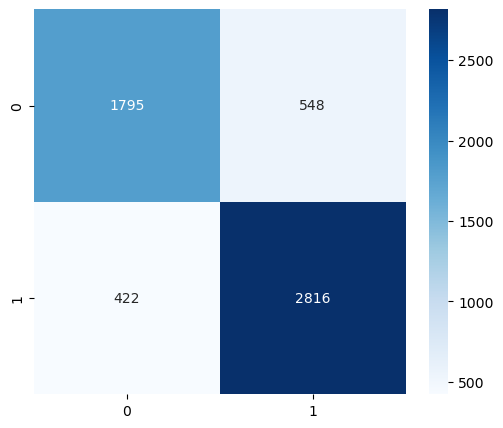

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

#Ma tran nham lan
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

plt.show()